In [2]:
import cv2
import numpy as np

from numpy import load


In [40]:
training_data_0_l=[]   #paper



In [57]:
training_data_1_l = []  #stone


In [3]:
training_data_2_l = []   #scissors

In [18]:
training_data_0_r = []

In [22]:
training_data_1_r =[]

In [4]:
training_data_2_r= []

In [3]:
#loading the data
training_data_0_l=np.load("training_data_0_l.npy")
training_data_1_l=np.load("training_data_1_l.npy")
training_data_2_l=np.load("training_data_2_l.npy")
training_data_0_r=np.load("training_data_0_r.npy")
training_data_1_r=np.load("training_data_1_r.npy")
training_data_2_r=np.load("training_data_2_r.npy")


In [ ]:


/////////COLLECTING IMAGES\\\\\\\\\\\\\




In [7]:
k=0
cap= cv2.VideoCapture(0)
print(cap.isOpened())
while(cap.isOpened()):
    _,frame = cap.read()
    frame= cv2.flip(frame,1)
    if(_ == False):
        break
    kernel= np.ones((6,6))    
    roi= frame[100:350,357:557]   
    #imgray= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
   # r , thresh= cv2.threshold(imgray,140,255,0)
    #cv2.rectangle(frame,(57,100),(57+200,100+250),(0,255,0),2)
   # cv2.rectangle(frame,(57+300,100),(57+200,100+250),(0,255,0),2)
    cv2.rectangle(frame,(57+300,100),(57+300+200,100+250),(0,255,0),2)
    hsv= cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
    ls= np.array([0, 58, 50])
    us= np.array([30, 255, 255])
    mask= cv2.inRange(hsv,ls,us)
    mask= cv2.dilate(mask,kernel,iterations=1)
    mask= cv2.GaussianBlur(mask,(5,5),50)
    
    #img_t = thresh[100:350,57:257]
    img_t = cv2.resize(mask,(100,100))
    #img_t= cv2.reshape(100,100)
    cv2.imshow("img_t",img_t)
    #cv2.imshow("thresgh",thresh)
    cv2.imshow("image",frame)
    k=k+1
   # print(k)
    if(k%30 ==0):
        training_data_2_r.append(img_t)
        k=k+1
        
        
   
    
    if(cv2.waitKey(1) & 0xFF==ord('q')):
        break
cap.release()
cv2.destroyAllWindows()
    
    


True


In [4]:
def calre(f,s):
    if(f==s):
        return "no"
    if(f==0 and s==1):
        return "1"
    if(f==1 and s==0):
        return "2"
    if(f==0 and s==2):
        return "2"
    if(f==2 and s==0):
        return "1"
    if(f==1 and s==2):
        return "1"
    if(f==2 and s==1):
        return "2"
    #if()


In [ ]:



///////GAME ON\\\\



In [ ]:
######creating second block
k=0
var=0
player=''
cap= cv2.VideoCapture(0)

while(cap.isOpened()):
    _,frame = cap.read()
    frame= cv2.flip(frame,1)
    if(_ == False):
        break
    #imgray= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
   # r , thresh= cv2.threshold(imgray,150,255,0)
    kernel= np.ones((6,6))    
    roi1= frame[100:350,57:257]   
    roi2= frame[100:350,357:557]   
    cv2.rectangle(frame,(57,100),(57+200,100+250),(0,255,0),2)
    cv2.rectangle(frame,(57+300,100),(57+300+200,100+250),(0,255,0),2)
    hsv1= cv2.cvtColor(roi1,cv2.COLOR_BGR2HSV)
    hsv2= cv2.cvtColor(roi2,cv2.COLOR_BGR2HSV)
    ls= np.array([0,20,70])
    us= np.array([20,255,255])
    mask1= cv2.inRange(hsv1,ls,us)
    mask2=cv2.inRange(hsv2,ls,us)
    mask1= cv2.dilate(mask1,kernel,iterations=1)
    mask2= cv2.dilate(mask2,kernel,iterations=1)
    
    mask1= cv2.GaussianBlur(mask1,(5,5),50)
    mask2= cv2.GaussianBlur(mask2,(5,5),50)
    
    
    #img_t = thresh[100:350,57:257]
    #img_t2= thresh[100:350,57+300:57+300+200]
    cv2.putText(frame,"1st PLAYER",(60,400),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(0,0,255),3)
    cv2.putText(frame,"2nd PLAYER",(357,400),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(0,0,255),3)

    img_t = cv2.resize(mask1,(100,100))
    img_t2= cv2.resize(mask2,(100,100))
    #img_t= cv2.reshape(100,100)
    cv2.putText(frame,player,(150,75),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,2,(124,133,55),3)
    cv2.imshow("img_t",img_t)
    cv2.imshow("img_t2",img_t2)
    #cv2.imshow("thresgh",thresh)
    cv2.imshow("image",frame)
    k=k+1
    #print(k)
    #if(var==1):
   # cv2.putText(frame,"bhghghjg",(10,20),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,1,(0,0,255),3,cv2.LINE_4)
        
    if(k==300):
        #training_data_2.append(img_t)
        #print(img_t.shape)
        f= np.array(img_t)
        f = f.reshape(-1,10000)
        s= np.array(img_t2)
        s =s.reshape(-1,10000)
        
        p= knc.predict(f)
        q= knc.predict(s)
        print(p[0],q[0])
        
        player=calre(p[0],q[0])
        if(player=="no"):
            player= "GAME TIE"
        else :   
            player = str(player) 
            if(player == '1'):
                player=player  + "st Player Win" 
            elif(player=='2'):
                 player=player  + "nd Player Win" 
                
        cv2.putText(frame,player,(10,20),cv2.FONT_HERSHEY_PLAIN,1,(0,0,255),3)
        var=1
       # print(yy.shape)
       # print(p[0])
        k=k+1
        
        
        
   
    
    if(cv2.waitKey(1) & 0xFF==ord('q')):
        break
cap.release()
cv2.destroyAllWindows()
    
    


0 0


In [25]:
cap= cv2.VideoCapture(0)
#fgbg= cv2.createBackgroundSubtractorMOG2()
while(True):
    _,frame = cap.read()
    frame= cv2.flip(frame,1)
    kernel= np.ones((6,6))
    roi= frame[100:300,100:300]
    cv2.rectangle(frame,(100,100),(300,300),(0,255,0),0)
    hsv= cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
    ls= np.array([0,20,70])
    us= np.array([20,255,255])
    mask= cv2.inRange(hsv,ls,us)
    mask= cv2.dilate(mask,kernel,iterations=1)
    mask= cv2.GaussianBlur(mask,(5,5),50)
   # cv2.putText(frame,"bhghghjg",(10,20),cv2.FONT_HERSHEY_PLAIN,1,(0,0,255),3,cv2.LINE_4)
   # fgmask=fgbg.apply(frame)
    cv2.imshow("mask",mask)
    cv2.imshow("image",frame)
        
    if(cv2.waitKey(1) & 0xFF==ord('q')):
        break
cap.release()
cv2.destroyAllWindows()
    

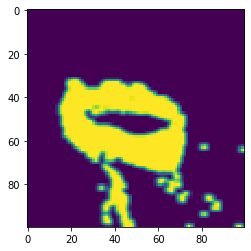

In [5]:
import matplotlib.pyplot as plt
arra=training_data_1_r[11]
arra= np.array(arra)
arra= arra.reshape(100,100)
plt.imshow(arra)




In [5]:
training_data_0_l = np.array(training_data_0_l)
training_data_1_l = np.array(training_data_1_l)
training_data_2_l = np.array(training_data_2_l)
training_data_0_r = np.array(training_data_0_r)
training_data_1_r = np.array(training_data_1_r)
training_data_2_r = np.array(training_data_2_r)
training_data_0_l = training_data_0_l.reshape(training_data_0_l.shape[0],-1)
training_data_1_l = training_data_1_l.reshape(training_data_1_l.shape[0],-1)
training_data_2_l = training_data_2_l.reshape(training_data_2_l.shape[0],-1)
training_data_0_r = training_data_0_r.reshape(training_data_0_r.shape[0],-1)
training_data_1_r = training_data_1_r.reshape(training_data_1_r.shape[0],-1)
training_data_2_r = training_data_2_r.reshape(training_data_2_r.shape[0],-1)




In [6]:
training_data_0_l.shape


(38, 10000)

In [7]:
overall_x_training = []
overall_y_training = []

for i in range(6):
    for j in range(30):
        if(i==0):
            overall_x_training.append(training_data_0_l[j])
            overall_y_training.append(i%3)
        if(i==1):
            overall_x_training.append(training_data_1_l[j])
            overall_y_training.append(i%3)    
        if(i==2):
            overall_x_training.append(training_data_2_l[j])
            overall_y_training.append(i%3)
        if(i==3):
            overall_x_training.append(training_data_0_r[j])
            overall_y_training.append(i%3)
        if(i==4):
            overall_x_training.append(training_data_1_r[j])
            overall_y_training.append(i%3)    
        if(i==5):
            overall_x_training.append(training_data_2_r[j])
            overall_y_training.append(i%3)
                
            
            
            
    

In [ ]:

//////ALGORITHMS USED\\\\

>LOGISTIC REGRESSION
>KNN
>SVM





In [8]:
overall_x_training= np.array(overall_x_training)
overall_y_training= np.array(overall_y_training)
overall_x_training.shape ,overall_y_training.shape

((180, 10000), (180,))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(overall_x_training,overall_y_training)



In [13]:
lr= LogisticRegression(max_iter=1500)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9555555555555556

In [10]:
from sklearn import svm
SVM= svm.SVC(C=100)
SVM.fit(x_train,y_train)
SVM.score(x_test,y_test)

0.9555555555555556

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
knc.score(x_test,y_test)


0.9555555555555556

In [24]:

from sklearn  import tree
tr= tree.DecisionTreeClassifier()
tr.fit(x_train,y_train)
tr.score(x_test,y_test)



0.7111111111111111

In [ ]:


//SAVING DATA\\\



In [40]:

np.save("training_data_0_l",training_data_0_l )
np.save("training_data_1_l",training_data_1_l )
np.save("training_data_2_l",training_data_2_l )
np.save("training_data_0_r",training_data_0_r )
np.save("training_data_1_r",training_data_1_r )
np.save("training_data_2_r",training_data_2_r )

